# Exercise Interpolation

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

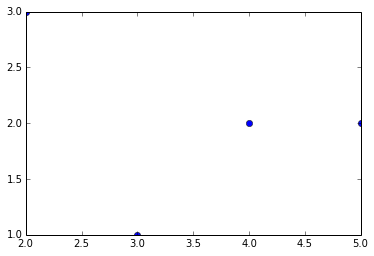

In [5]:
plt.plot([2,3,4,5],[3,1,2,2],'o')

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

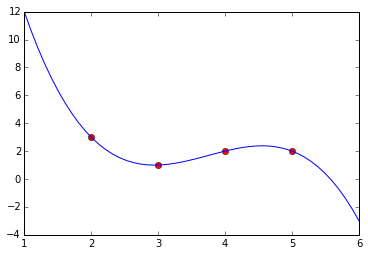

In [68]:
def f(x,l,yl):
    ans = 0
    for i in range(len(l)):
        numerator = 1
        denominator = 1
        for j in range(len(l)):
            if j != i:
                numerator = numerator * (x-l[j])
                denominator = denominator * (l[i]-l[j])
        ans+= yl[i]*numerator/float(denominator)
    return ans

xlst = [2,3,4,5]
ylst = [3,1,2,2]

plt.plot([2,3,4,5],[3,1,2,2],'or')

xs = np.linspace(1,6,50)
plt.plot(xs,[f(x,xlst,ylst) for x in xs])
                

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

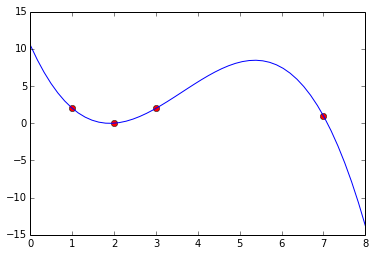

In [14]:
xs = np.linspace(0,8,50)
xlst = [1,2,3,7]
ylst = [2,0,2,1]
plt.plot(xlst,ylst,'or')


plt.plot(xs,[f(x,xlst,ylst) for x in xs])

4) Write a function `ledendre(x, xs, ys)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5, [1,2,3,7], [2,0,2,1])`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [ ]:
def legendre(x, xs, ys):
    #fill in
    return 0. #change this

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

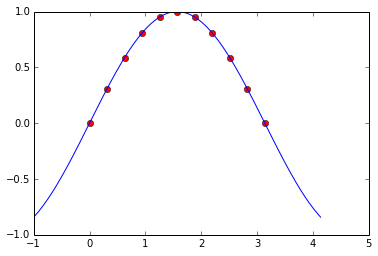

In [21]:
pxs= np.linspace(0,math.pi,11)
yxs = np.sin(pxs)
plt.plot(pxs,yxs,"or")
xs = np.linspace(-1,math.pi+1,200)
ys = [f(x,pxs,yxs) for x in xs]
plt.plot(xs,ys)

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

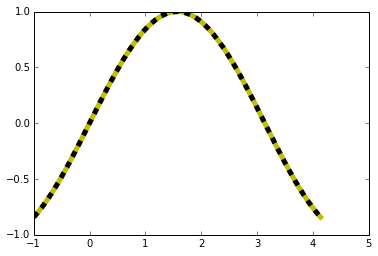

In [36]:
pxs= np.linspace(0,math.pi,11)
yxs = np.sin(pxs)

xs = np.linspace(-1,math.pi+1,200)
ys = [f(x,pxs,yxs) for x in xs]
plt.plot(xs,ys,lw=5,color="y")
sys = np.sin(xs)
plt.plot(xs,sys,lw=5,color="k",ls="--")

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

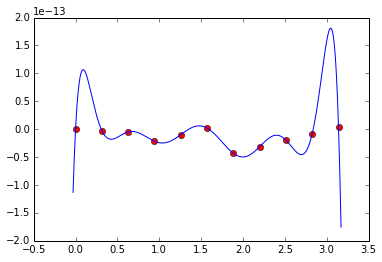

In [63]:
pxs= np.linspace(0,math.pi,11)
yxs = [math.sin(200*x) for x in pxs]
plt.plot(pxs,yxs,"or")
xs = np.linspace(-0.03,math.pi+0.03,2000)
ys = [f(x,pxs,yxs) for x in xs]
plt.plot(xs,ys)

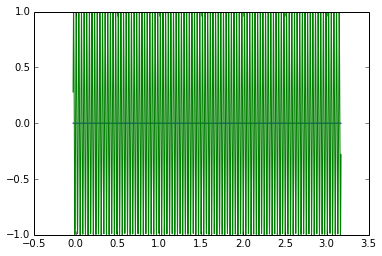

In [64]:
rys = [math.sin(200*x) for x in xs]
plt.plot(xs,ys)
plt.plot(xs,rys)

8) Does it pass through all the point? Does it look like the original function.

# Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [76]:
def f(x):
    return x**3
def intf(l,u):
    return u**4/4. - l**4/4.

def calculate(x0,xf,n):
    h = (xf-x0)/n
    i = x0 + h
    ans = f(x0)/2. + f(xf)/2.
    while(i<xf):
        
        ans+=f(i)
#         print ans
        i+=h
#     ans = ans - f(x0)/2. - f(xf)/2.
    ans = h*ans
    return ans

print calculate(1,3,1),intf(1,3)

28.0 20.0


2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [77]:
print calculate(1,3,100.),intf(1,3)

20.0008 20.0


Example: Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=2} x^3 \; dx $$

Using 10 pieces.

In [91]:
traparea = calculate(1,2,10.)
#error = (b-a)^3/12n^2   * (f''(xi))
# error between 1-2 of 6x
def ddf(x):
    return 6*x
b = 2
a = 1
n=10
xi=2
error = (b-a)**3/(12.*n**2) * ddf(xi)
print error
print traparea, traparea+error,traparea-error , intf(1,2)

0.01
3.7575 3.7675 3.7475 3.75


3) What is the bound on error for 1)?

In [90]:
b=3
a=1
n=1
xi=3
error1 = (b-a)**3/(12.*n**2) * ddf(xi)
print error1

12.0


4) What is the bound on error for 2)?

In [87]:
b=3
a=1
n=100
xi=3
error2 = (b-a)**3/(12.*n**2) * ddf(xi)
print error2

0.0012


5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those thing you can't do by hands. 

In [94]:
def f(x):
    return math.exp(-x)*math.sin(x**2)


def calculate(x0,xf,n):
    h = (xf-x0)/n
    ans = f(x0)/2. + f(xf)/2.
    i = x0+h

    while(i<xf):
        ans+=f(i)
        i+=h
    ans = h*ans
    return ans
print calculate(0,1,100.)

0.150913300269


6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [99]:
def ddf(x):
    return math.exp(-x)

def f(x):
    return math.exp(-x)

def calculate(x0,xf,n):
    h = (xf-x0)/n
    ans = f(x0)/2. + f(xf)/2.
    i = x0+h

    while(i<xf):
        ans+=f(i)
        i+=h
    ans = h*ans
    return ans
# print calculate(0,1,100.)

def error(a,b,n,xi):
    return (b-a)**3/(12.*n**2) * ddf(xi)

def findSol(a,b,n,xi):
    err = error(a,b,n,xi)
    while(np.abs(err)>1e-6):
        n+=1
        err = error(a,b,n,xi)

#         print err
    return n

print findSol(0,1,1,0)

289


7) Compute the integral above and make sure your answer is at most $10^-6$ away from the real answer. 

In [101]:
ans= calculate(0,1,289.)
err = error(0,1,289.,0)
print ans + err,ans-err


 0.632122187282 0.632120191776
